Határozzuk meg az alábbi ábrán látható tartó súlypontvonalának eltolódását leíró $v\left(x\right)$ függvényt végeselemes módszer használatával, síkbeli egyenes gerendalemek alkalmazásával.
Vizsgáljuk meg a végeselemes megoldással kapott hajlítónyomatéki igénybevétel hibáját az egyes szakaszokon.
Határozzuk meg az $x = a/2$ keresztmetszetben a hajlítónyomatéki igénybevétel nagyságát 2, illetve 3 síkbeli egyenes gerendaelem alkalmazásával.
A tartók két különböző átmérőjű ($d_1 = 2d$, illetve $d_2 = d$) kör keresztmetszetű tartókból
vannak összeépítve.
A tartók anyaga lineárisan rugalmas, homogén, izotrop. A $d_1$ átmérőjű rész rugalmassági modulusza $E$, míg a $d_2$ átmérővel rendelkező részé $4E$.

In [142]:
import sympy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

sp.init_printing()

In [143]:
ro, xi, L, A, I, E = sp.symbols("rho, xi L A I E")

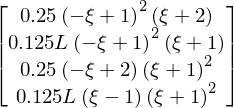

In [144]:
Nv = 1/8*sp.Matrix([2*(1-xi)**2*(2+xi),
                 L*(1-xi)**2*(1+xi),
                 2*(1+xi)**2*(2-xi),
                 L*(1+xi)**2*(xi-1)])
Nv

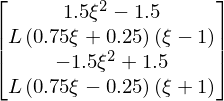

In [145]:
Nfi=sp.diff(Nv,xi)*(2/L)
sp.simplify((1/L)**(-1)*Nfi)

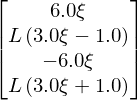

In [146]:
Bv=sp.diff(Nv,xi,2)*(2/L)**2
sp.simplify((1/L**2)**(-1)*Bv)

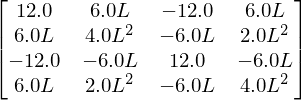

In [147]:
KeBEAM1D = I*E*sp.integrate(Bv*(Bv.T),(xi,-1,1))*L/2
(I*E/L**3)**(-1)*KeBEAM1D

In [148]:
MeBEAM1D = A*ro*sp.integrate(Nv*(Nv.T),(xi,-1,1))*L/2
print((A*ro*L/420)**(-1)*MeBEAM1D)

Matrix([[156.000000000000, 22.0*L, 54.0000000000000, -13.0*L], [22.0*L, 4.0*L**2, 13.0*L, -3.0*L**2], [54.0000000000000, 13.0*L, 156.000000000000, -22.0*L], [-13.0*L, -3.0*L**2, -22.0*L, 4.0*L**2]])


In [149]:
def Nvfgv(xi,L):
    return np.array([1/4*(1-xi)**2*(2+xi),
                 L/8*(1-xi)**2*(1+xi),
                 1/4*(1+xi)**2*(2-xi),
                 L/8*(1+xi)**2*(xi-1)])

In [150]:
def Nfifgv(xi,L):
    return np.multiply(1/L,np.array([1.5*xi**2-1.5,
                     L*(0.75*xi+0.25)*(xi-1),
                     -1.5*xi**2+1.5,
                     L*(0.75*xi-0.25)*(xi+1)]))

In [151]:
def KeBEAM1D(I,E,L):
    return np.multiply(I*E/L**3, np.array([[12,   6*L,    -12,  6*L],
                                           [6*L,  4*L**2, -6*L, 2*L**2],
                                           [-12,  -6*L,    12,  -6*L],
                                           [6*L, 2*L**2, -6*L, 4*L**2]]))

In [152]:
def MeBEAM1D(A,ro,L):
    return np.multiply(A*ro*L/420, np.array([
        [156, 22*L, 54, -13*L],
        [22*L, 4*L**2, 13*L, -3*L**2],
        [54, 13*L, 156, -22*L],
        [-13*L, -3*L**2, -22*L, 4*L**2]]))

In [153]:
L1 = 200e-3
L2 = 600e-3
L3 = 300e-3

d1 = 20e-3
d2 = 30e-3
d3 = 20e-3
d4 = 300e-3

s1 = 10e3
s2 = 1000e3
s3 = 2500e3

m = 0.5
E = 200e9
ro = 7850

In [154]:
I1 = (d1)**4*np.pi/64
I2 = (d2)**4*np.pi/64
I3 = (d3)**4*np.pi/64

A1 = (d1)**2*np.pi/4
A2 = (d2)**2*np.pi/4
A3 = (d3)**2*np.pi/4

Ke1 = KeBEAM1D(I1,E,L1)
Ke2 = KeBEAM1D(I2,E,L2)
Ke3 = KeBEAM1D(I3,E,L3)

Me1 = MeBEAM1D(A1,ro,L1)
Me2 = MeBEAM1D(A2,ro,L2)
Me3 = MeBEAM1D(A3,ro,L3)

thetaz = 1/4*m*(d4/2)**2

In [155]:
elemSZF = np.array([[1,2,3,4],[3,4,5,6],[5,6,7,8]]) - 1

In [156]:
KG=np.zeros((8,8))
MG=np.zeros((8,8))

In [157]:
eind=0
KG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Ke1
MG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Me1

In [158]:
eind=1
KG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Ke2
MG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Me2

In [159]:
eind=2
KG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Ke3
MG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Me3

In [160]:
KG[elemSZF[0][0],elemSZF[0][0]]+=s1
KG[elemSZF[0][2],elemSZF[0][2]]+=s2
KG[elemSZF[1][2],elemSZF[1][2]]+=s3

In [161]:
MG[elemSZF[2][2],elemSZF[2][2]] += m
MG[elemSZF[2][3],elemSZF[2][3]] += thetaz

In [162]:
fixSZF=np.array([])

In [163]:
szabadSZF=[i for i in range(0,8) if i not in fixSZF]
szabadSZF

In [164]:
KK = KG[np.ix_(szabadSZF,szabadSZF)]
MK = MG[np.ix_(szabadSZF,szabadSZF)]

In [165]:
sajatErtek, sajatVektor = np.linalg.eig(np.linalg.solve(MK,KK))
np.sqrt(sajatErtek)

array([ 26458.01845952,   7429.77280567,   4367.3802812 ,   2525.46582768,
         1682.73657981,   1012.43565175,    715.60241866,    374.06415577])

In [166]:
UG1 = np.zeros(8)
UG1[np.ix_(szabadSZF)] = sajatVektor[:,-1]

UG2 = np.zeros(8)
UG2[np.ix_(szabadSZF)] = sajatVektor[:,-2]

UG3 = np.zeros(8)
UG3[np.ix_(szabadSZF)] = sajatVektor[:,-3]

# Eredmények ábrázolása

In [167]:
xiLista = np.linspace(-1,1,num = 10)
cspxKRD=[[0,L1],[L1,L1+L2],[L1+L2,L1+L2+L3]]
cspxKRD

In [168]:
x1Lista=[(cspxKRD[0][1]-cspxKRD[0][0])/2*(xi+1) + cspxKRD[0][0] for xi in xiLista]
x2Lista=[(cspxKRD[1][1]-cspxKRD[1][0])/2*(xi+1) + cspxKRD[1][0] for xi in xiLista]
x3Lista=[(cspxKRD[2][1]-cspxKRD[2][0])/2*(xi+1) + cspxKRD[2][0] for xi in xiLista]
xLista = np.concatenate((x1Lista,x2Lista,x3Lista))

In [169]:
v1Lista = [np.dot(Nvfgv(xi,L1),UG1[elemSZF[0]]) for xi in xiLista]
v2Lista = [np.dot(Nvfgv(xi,L2),UG1[elemSZF[1]]) for xi in xiLista]
v3Lista = [np.dot(Nvfgv(xi,L3),UG1[elemSZF[2]]) for xi in xiLista]
vLista = np.concatenate((v1Lista,v2Lista,v3Lista))

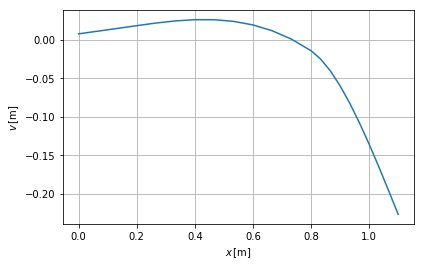

In [170]:
figv = plt.figure(num = 1, figsize=(16/2.54,10/2.54))
axv = figv.add_subplot(111)

axv.plot(xLista,vLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$v \, \left[\mathrm{m}\right]$")

plt.grid()
plt.legend()
plt.show()

In [171]:
v1Lista = [np.dot(Nvfgv(xi,L1),UG2[elemSZF[0]]) for xi in xiLista]
v2Lista = [np.dot(Nvfgv(xi,L2),UG2[elemSZF[1]]) for xi in xiLista]
v3Lista = [np.dot(Nvfgv(xi,L3),UG2[elemSZF[2]]) for xi in xiLista]
vLista = np.concatenate((v1Lista,v2Lista,v3Lista))

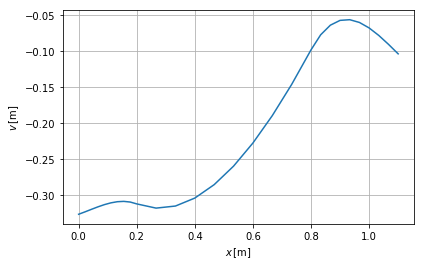

In [172]:
figv = plt.figure(num = 2, figsize=(16/2.54,10/2.54))
axv = figv.add_subplot(111)

axv.plot(xLista,vLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$v \, \left[\mathrm{m}\right]$")

plt.grid()
plt.legend()
plt.show()

In [173]:
v1Lista = [np.dot(Nvfgv(xi,L1),UG3[elemSZF[0]]) for xi in xiLista]
v2Lista = [np.dot(Nvfgv(xi,L2),UG3[elemSZF[1]]) for xi in xiLista]
v3Lista = [np.dot(Nvfgv(xi,L3),UG3[elemSZF[2]]) for xi in xiLista]
vLista = np.concatenate((v1Lista,v2Lista,v3Lista))

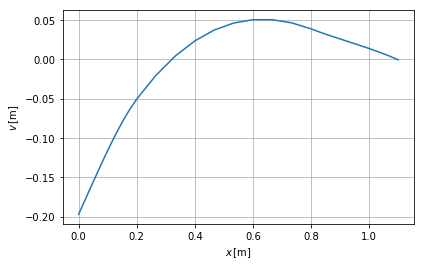

In [174]:
figv = plt.figure(num = 3, figsize=(16/2.54,10/2.54))
axv = figv.add_subplot(111)

axv.plot(xLista,vLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$v \, \left[\mathrm{m}\right]$")

plt.grid()
plt.legend()
plt.show()